In [62]:
import csv
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import re
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amin.schleiter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amin.schleiter\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
data = pd.read_csv('emails_ohne_Metadaten.csv')

Data Exploration

In [46]:
x = data['text']
y = data['spam']

<AxesSubplot:>

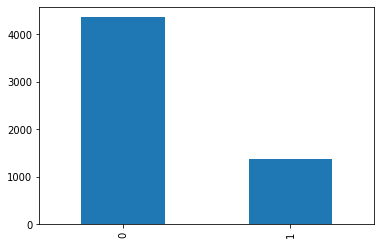

In [47]:
y.value_counts().plot(kind="bar")

In [48]:
data.sample(5)

,text,spam
5381,Subject: re : hotel for the wharton trip hi v...,0
3810,"Subject: reminder stinson , fyi vince - - ...",0
3903,Subject: energy : oil drilling : survey finds ...,0
4024,"Subject: hello shirley , can you , please , ...",0
1438,"Subject: joao neves vince , i wanted to foll...",0


In [49]:
data['length']=data['text'].apply(len)
data.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [50]:
data[data.spam==0].describe()

,spam,length
count,4360.0,4360.000000
mean,0.0,1631.918119
std,0.0,1959.664549
min,0.0,13.000000
25%,0.0,577.750000
50%,0.0,1122.000000
75%,0.0,2037.250000
max,0.0,43952.000000


C:\Users\amin.schleiter\AppData\Local\Temp\ipykernel_17656\3701130527.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data[data['spam']==0].length,kde=False)


<AxesSubplot:xlabel='length'>

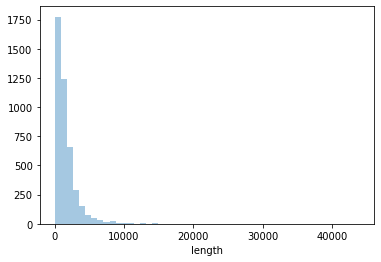

In [51]:
sns.distplot(a=data[data['spam']==0].length,kde=False)

In [52]:
data[data.spam==1].describe()

,spam,length
count,1368.0,1368.000000
mean,1.0,1317.257310
std,0.0,2271.372893
min,1.0,18.000000
25%,1.0,401.500000
50%,1.0,693.500000
75%,1.0,1250.250000
max,1.0,28432.000000


C:\Users\amin.schleiter\AppData\Local\Temp\ipykernel_17656\4261419831.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data[data['spam']==1].length,kde=False)


<AxesSubplot:xlabel='length'>

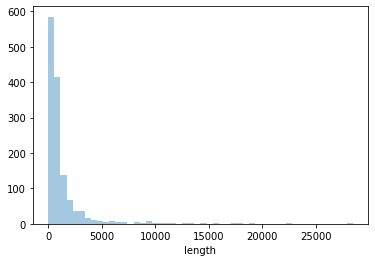

In [55]:
sns.distplot(a=data[data['spam']==1].length,kde=False)

In [60]:
data['token']=""

for i in data.index:
  data['token'][i]=re.split("\W+",data['text'][i].lower())

data.head()

C:\Users\amin.schleiter\AppData\Local\Temp\ipykernel_17656\1018352609.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['token'][i]=re.split("\W+",data['text'][i].lower())


,text,spam,length,token
0,Subject: naturally irresistible your corporate...,1,1484,"[subject, naturally, irresistible, your, corpo..."
1,Subject: the stock trading gunslinger fanny i...,1,598,"[subject, the, stock, trading, gunslinger, fan..."
2,Subject: unbelievable new homes made easy im ...,1,448,"[subject, unbelievable, new, homes, made, easy..."
3,Subject: 4 color printing special request add...,1,500,"[subject, 4, color, printing, special, request..."
4,"Subject: do not have money , get software cds ...",1,235,"[subject, do, not, have, money, get, software,..."


Stopwords sind häufig verwendete Füllwörter "on"

In [63]:
data['updated_token']=""
stopwords=nltk.corpus.stopwords.words('english')

for i in data.index:
  updated_list=[]
  for j in range(len(data['token'][i])):
    if data['token'][i][j] not in stopwords:
      updated_list.append(data['token'][i][j])
  data['updated_token'][i]=updated_list

data.drop(['token'],axis=1,inplace=True)
data.head()

C:\Users\amin.schleiter\AppData\Local\Temp\ipykernel_17656\2651390941.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['updated_token'][i]=updated_list


,text,spam,length,updated_token
0,Subject: naturally irresistible your corporate...,1,1484,"[subject, naturally, irresistible, corporate, ..."
1,Subject: the stock trading gunslinger fanny i...,1,598,"[subject, stock, trading, gunslinger, fanny, m..."
2,Subject: unbelievable new homes made easy im ...,1,448,"[subject, unbelievable, new, homes, made, easy..."
3,Subject: 4 color printing special request add...,1,500,"[subject, 4, color, printing, special, request..."
4,"Subject: do not have money , get software cds ...",1,235,"[subject, money, get, software, cds, software,..."


In [65]:
data['lem_text']=""
wordlem=nltk.WordNetLemmatizer()

for i in data.index:
  updated_list=[]
  for j in range(len(data['updated_token'][i])):
    updated_list.append(wordlem.lemmatize(data['updated_token'][i][j]))
  data['lem_text'][i]=updated_list 

data.drop(['updated_token'],axis=1,inplace=True)
data.head()

C:\Users\amin.schleiter\AppData\Local\Temp\ipykernel_17656\3733085368.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lem_text'][i]=updated_list


,text,spam,length,lem_text
0,Subject: naturally irresistible your corporate...,1,1484,"[subject, naturally, irresistible, corporate, ..."
1,Subject: the stock trading gunslinger fanny i...,1,598,"[subject, stock, trading, gunslinger, fanny, m..."
2,Subject: unbelievable new homes made easy im ...,1,448,"[subject, unbelievable, new, home, made, easy,..."
3,Subject: 4 color printing special request add...,1,500,"[subject, 4, color, printing, special, request..."
4,"Subject: do not have money , get software cds ...",1,235,"[subject, money, get, software, cd, software, ..."


In [66]:
data['final_text']=""

for i in data.index:
  updated_string=" ".join(data['lem_text'][i])
  data['final_text'][i]=updated_string

data.drop(['text','lem_text'],axis=1,inplace=True)
data.head()

C:\Users\amin.schleiter\AppData\Local\Temp\ipykernel_17656\2021141179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['final_text'][i]=updated_string


,spam,length,final_text
0,1,1484,subject naturally irresistible corporate ident...
1,1,598,subject stock trading gunslinger fanny merrill...
2,1,448,subject unbelievable new home made easy im wan...
3,1,500,subject 4 color printing special request addit...
4,1,235,subject money get software cd software compati...


In [67]:
y=pd.DataFrame(data.spam)
x=data.drop(['spam'],axis=1)

In [68]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3,random_state=999)

In [69]:
cv=CountVectorizer(max_features=5000)
temp_train=cv.fit_transform(x_train['final_text']).toarray()
temp_val=cv.transform(x_val['final_text']).toarray()

In [70]:
tf=TfidfTransformer()
temp_train=tf.fit_transform(temp_train)
temp_val=tf.transform(temp_val)

In [71]:
temp_train=pd.DataFrame(temp_train.toarray(),index=x_train.index)
temp_val=pd.DataFrame(temp_val.toarray(),index=x_val.index)
x_train=pd.concat([x_train,temp_train],axis=1,sort=False)
x_val=pd.concat([x_val,temp_val],axis=1,sort=False)

x_train.head()

,length,final_text,0,1,2,3,4,5,6,7,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
1095,1480,subject naturally irresistible corporate ident...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2490,5018,subject houston research opportunity anjam vin...,0.017857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4188,697,subject summary dabhol lender presentation vin...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3446,548,subject visit houston vince kaminski research ...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4274,724,subject meeting petronas february 8 th eric mr...,0.067922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
x_train.drop(['final_text'],axis=1,inplace=True)
x_val.drop(['final_text'],axis=1,inplace=True)

x_train.head()

,length,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
1095,1480,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2490,5018,0.017857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4188,697,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3446,548,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4274,724,0.067922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
y_train=y_train.astype(int)
y_val=y_val.astype(int)

In [74]:
#Multinomial Naive Bayes
model=MultinomialNB()
model.fit(x_train,y_train)
y_preds=model.predict(x_val)
print("Multinomial Naive Bayes:",accuracy_score(y_val,y_preds))

C:\Users\amin.schleiter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\amin.schleiter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Multinomial Naive Bayes: 0.9650959860383944


C:\Users\amin.schleiter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [75]:
#Decision Tree
model=DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)
y_preds=model.predict(x_val)
print("Decision Tree:",accuracy_score(y_val,y_preds))

C:\Users\amin.schleiter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Decision Tree: 0.9592786503781268


C:\Users\amin.schleiter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [76]:
#Random Forest
model=RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(x_train,y_train)
y_preds=model.predict(x_val)
print("Random Forest:",accuracy_score(y_val,y_preds))

C:\Users\amin.schleiter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\amin.schleiter\AppData\Local\Temp\ipykernel_17656\2320910185.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)
C:\Users\amin.schleiter\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Random Forest: 0.9872018615474113


In [79]:
accuracy = accuracy_score(y_test, y_preds)
print("test loss, test accuracy:", accuracy)

test loss, test accuracy: 0.9872018615474113


In [82]:
confusion = confusion_matrix(y_test, y_preds)


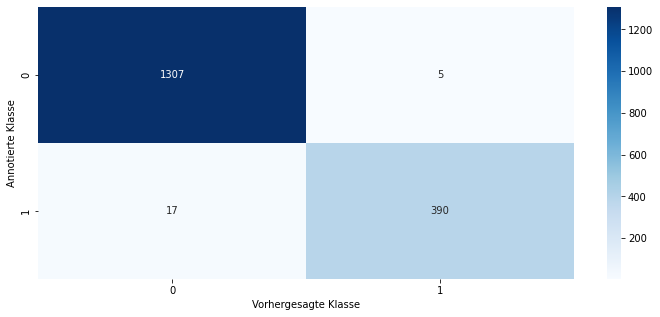

In [83]:
plt.figure(figsize=(12,5))
sns.heatmap(confusion, annot=True, fmt="d", cmap=plt.cm.Blues)

plt.xlabel("Vorhergesagte Klasse")
plt.ylabel("Annotierte Klasse")
plt.show()